In [84]:
#importing modules

import pandas as pd
import numpy as np
from numpy import percentile

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from tabulate import tabulate

In [2]:
#reading dataset using pandas

dataset = pd.read_excel('Week2_challenge_data_source.xlsx')

In [3]:
dataset.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

## Full User Overview Analysis

### top 10 handsets used by customers

In [5]:
dataset['Handset Type']

0          Samsung Galaxy A5 Sm-A520F
1         Samsung Galaxy J5 (Sm-J530)
2            Samsung Galaxy A8 (2018)
3                           undefined
4                    Samsung Sm-G390F
                     ...             
149996    Apple iPhone 8 Plus (A1897)
149997        Apple iPhone Se (A1723)
149998        Apple iPhone Xs (A2097)
149999                 Huawei Fig-Lx1
150000                            NaN
Name: Handset Type, Length: 150001, dtype: object

In [6]:
dataset['Handset Type'].nunique()

1396

In [7]:
s = dataset.groupby(['Handset Type']).agg({'Handset Type': ['count']})
s.columns = ['count']
s = s.reset_index()
s.head()

,Handset Type,count
0,A-Link Telecom I. Cubot A5,1
1,A-Link Telecom I. Cubot Note Plus,1
2,A-Link Telecom I. Cubot Note S,1
3,A-Link Telecom I. Cubot Nova,1
4,A-Link Telecom I. Cubot Power,1


In [8]:
s = s.drop([1395], axis = 0)
s = s.nlargest(10, 'count')
print('Top 10 handsets used by customers')
print('------------------------------------------------')
print(tabulate(s, headers = 'keys', tablefmt = 'fancy_grid'))

Top 10 handsets used by customers
------------------------------------------------
╒═════╤══════════════════════════════╤═════════╕
│     │ Handset Type                 │   count │
╞═════╪══════════════════════════════╪═════════╡
│ 316 │ Huawei B528S-23A             │   19752 │
├─────┼──────────────────────────────┼─────────┤
│  53 │ Apple iPhone 6S (A1688)      │    9419 │
├─────┼──────────────────────────────┼─────────┤
│  49 │ Apple iPhone 6 (A1586)       │    9023 │
├─────┼──────────────────────────────┼─────────┤
│  59 │ Apple iPhone 7 (A1778)       │    6326 │
├─────┼──────────────────────────────┼─────────┤
│  73 │ Apple iPhone Se (A1723)      │    5187 │
├─────┼──────────────────────────────┼─────────┤
│  66 │ Apple iPhone 8 (A1905)       │    4993 │
├─────┼──────────────────────────────┼─────────┤
│  78 │ Apple iPhone Xr (A2105)      │    4568 │
├─────┼──────────────────────────────┼─────────┤
│ 955 │ Samsung Galaxy S8 (Sm-G950F) │    4520 │
├─────┼────────────────────────────

### top 3 handsets manufacturers

In [9]:
dataset['Handset Manufacturer']

0           Samsung
1           Samsung
2           Samsung
3         undefined
4           Samsung
            ...    
149996        Apple
149997        Apple
149998        Apple
149999       Huawei
150000          NaN
Name: Handset Manufacturer, Length: 150001, dtype: object

In [10]:
dataset['Handset Manufacturer'].nunique()

170

In [11]:
m = dataset.groupby(['Handset Manufacturer']).agg({'Handset Manufacturer': ['count']})
m.columns = ['count']
m = m.reset_index()
m.head()

,Handset Manufacturer,count
0,A-Link Telecom International Co Limited,8
1,ASUSTeK,23
2,Acer,14
3,Adar,1
4,Alif Communications,1


In [12]:
m = m.nlargest(3, 'count')
print('Top 3 handset manufacturers')
print('------------------------------------------')
print(tabulate(m, headers = 'keys', tablefmt = 'fancy_grid'))

Top 3 handset manufacturers
------------------------------------------
╒═════╤════════════════════════╤═════════╕
│     │ Handset Manufacturer   │   count │
╞═════╪════════════════════════╪═════════╡
│   5 │ Apple                  │   59565 │
├─────┼────────────────────────┼─────────┤
│ 103 │ Samsung                │   40839 │
├─────┼────────────────────────┼─────────┤
│  52 │ Huawei                 │   34423 │
╘═════╧════════════════════════╧═════════╛


### top 5 handsets per handset manufacturer

In [13]:
top_man = dataset.loc[(dataset['Handset Manufacturer'] == 'Apple') | (dataset['Handset Manufacturer'] == 'Samsung') | (dataset['Handset Manufacturer'] == 'Huawei')]

In [14]:
sm = top_man.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})

sm.columns = ['count']
#sm = sm.reset_index()
#.nlargest(5, 'count')
sm

count
Handset Manufacturer Handset Type                      
Apple                Apple iPad (A1823)               9
                     Apple iPad (A1954)               9
                     Apple iPad 2 (A1396)             4
                     Apple iPad 3 (A1430)             2
                     Apple iPad 4 (A1460)             8
...                                                 ...
Samsung              Samsung Sm-J250Y Ds             45
                     Samsung Sm-N7505                 8
                     Samsung Sm-T235                  1
                     Samsung Sm-T819                  4
                     Samsung Xcover 3 (Sm-G388X)    221

[425 rows x 1 columns]

## Task 1.1: User's behavior overview

### number of xDR sessions per user

In [15]:
sessions = dataset.groupby(['MSISDN/Number']).agg({'Bearer Id': ['count']})
sessions.columns = ['count']
sessions = sessions.reset_index()
sessions.head()

,MSISDN/Number,count
0,3.360100e+10,1
1,3.360100e+10,1
2,3.360100e+10,1
3,3.360101e+10,1
4,3.360101e+10,2


### total session duration per user

In [16]:
session_duration = dataset.groupby(['MSISDN/Number']).agg({'Dur. (ms).1': ['sum']})
session_duration.columns = ['Total Duration/user (ms)']
session_duration = session_duration.reset_index()
session_duration.head()

,MSISDN/Number,Total Duration/user (ms)
0,3.360100e+10,116720140.0
1,3.360100e+10,181230963.0
2,3.360100e+10,134969374.0
3,3.360101e+10,49878024.0
4,3.360101e+10,37104453.0


### total download (DL) and upload (UL) data per user

In [17]:
#adding Total UL and Total DL to get Total Data

dataset['Total Data (Bytes)'] = dataset['Total UL (Bytes)'] + dataset['Total DL (Bytes)']

In [18]:
total_ul_dl_data = dataset.groupby(['MSISDN/Number']).agg({'Total Data (Bytes)': ['sum']})
total_ul_dl_data.columns = ['Total Data/user (bytes)']
total_ul_dl_data = total_ul_dl_data.reset_index()
total_ul_dl_data.head()

,MSISDN/Number,Total Data/user (bytes)
0,3.360100e+10,8.786906e+08
1,3.360100e+10,1.568596e+08
2,3.360100e+10,5.959665e+08
3,3.360101e+10,4.223207e+08
4,3.360101e+10,1.457411e+09


### total data volume on each application for each user

In [19]:
#adding Total UL and Total DL to get Total Data Volume for each application

dataset['Total Social Media Data (Bytes)'] = dataset['Social Media UL (Bytes)'] + dataset['Social Media DL (Bytes)']
dataset['Total Google Data (Bytes)'] = dataset['Google UL (Bytes)'] + dataset['Google DL (Bytes)']
dataset['Total Email Data (Bytes)'] = dataset['Email UL (Bytes)'] + dataset['Email DL (Bytes)']
dataset['Total Youtube Data (Bytes)'] = dataset['Youtube UL (Bytes)'] + dataset['Youtube DL (Bytes)']
dataset['Total Netflix Data (Bytes)'] = dataset['Netflix UL (Bytes)'] + dataset['Netflix DL (Bytes)']
dataset['Total Gaming Data (Bytes)'] = dataset['Gaming UL (Bytes)'] + dataset['Gaming DL (Bytes)']
dataset['Total Other Data (Bytes)'] = dataset['Other UL (Bytes)'] + dataset['Other DL (Bytes)']

In [20]:
total_data_application = dataset.groupby(['MSISDN/Number']).agg({'Total Social Media Data (Bytes)': ['sum'], 'Total Google Data (Bytes)': ['sum'], 'Total Email Data (Bytes)': ['sum'], 'Total Youtube Data (Bytes)': ['sum'], 'Total Netflix Data (Bytes)': ['sum'], 'Total Gaming Data (Bytes)': ['sum'], 'Total Other Data (Bytes)': ['sum']})
total_data_application.columns = ['Total Social Media Data/user (bytes)', 'Total Google Data/user (bytes)', 'Total Email Data/user (bytes)', 'Total Youtube Data/user (bytes)', 'Total Netflix Data/user (bytes)', 'Total Gaming Data/user (bytes)', 'Total Other Data/user (bytes)']
total_data_application = total_data_application.reset_index()
total_data_application.head()

,MSISDN/Number,Total Social Media Data/user (bytes),Total Google Data/user (bytes),Total Email Data/user (bytes),Total Youtube Data/user (bytes),Total Netflix Data/user (bytes),Total Gaming Data/user (bytes),Total Other Data/user (bytes)
0,3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
1,3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
2,3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0
3,3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
4,3.360101e+10,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0


## Task 1.2: Exploratory Data Analysis

In [22]:
dataset.shape

(150001, 63)

In [23]:
dataset.dtypes

Bearer Id                             object
Start                         datetime64[ns]
Start ms                             float64
End                           datetime64[ns]
End ms                               float64
                                   ...      
Total Email Data (Bytes)             float64
Total Youtube Data (Bytes)           float64
Total Netflix Data (Bytes)           float64
Total Gaming Data (Bytes)            float64
Total Other Data (Bytes)             float64
Length: 63, dtype: object

In [24]:
#converting the data types of miscorrectly interpreted variables. ie. identity numbers interpreted as float64 instead of object

dataset['IMSI'] = dataset['IMSI'].astype('object')
dataset['MSISDN/Number'] = dataset['MSISDN/Number'].astype('object')
dataset['IMEI'] = dataset['IMEI'].astype('object')

In [26]:
#dropping the last column of the dataset since it has no bearer Id, the unique identifier for this dataset

dataset = dataset.drop([150000], axis = 0)

In [27]:
dataset.describe()

,Start ms,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),...,Total UL (Bytes),Total DL (Bytes),Total Data (Bytes),Total Social Media Data (Bytes),Total Google Data (Bytes),Total Email Data (Bytes),Total Youtube Data (Bytes),Total Netflix Data (Bytes),Total Gaming Data (Bytes),Total Other Data (Bytes)
count,150000.000000,150000.000000,1.500000e+05,122172.000000,122189.000000,150000.000000,150000.000000,6.185500e+04,5.335200e+04,149247.000000,...,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05
mean,499.188200,498.800880,1.046086e+05,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,92.844754,...,4.112121e+07,4.546434e+08,4.957646e+08,1.828250e+06,7.807295e+06,2.259102e+06,2.264348e+07,2.262861e+07,4.303331e+08,4.293653e+08
std,288.611834,288.097653,8.103762e+04,619.782739,84.793524,23971.878541,4625.355500,1.825665e+08,2.645305e+07,13.038031,...,1.127639e+07,2.441429e+08,2.443818e+08,1.035650e+06,3.516432e+06,1.071113e+06,9.246831e+06,9.260851e+06,2.440207e+08,2.432689e+08
min,0.000000,0.000000,7.142000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,...,2.866892e+06,7.114041e+06,2.895611e+07,1.563000e+03,4.033000e+04,8.359000e+03,7.890300e+04,9.843200e+04,3.063580e+05,1.490450e+05
25%,250.000000,251.000000,5.744050e+04,32.000000,2.000000,43.000000,47.000000,3.565150e+04,4.694750e+03,91.000000,...,3.322201e+07,2.431068e+08,2.844759e+08,9.322132e+05,4.943592e+06,1.359343e+06,1.599846e+07,1.597944e+07,2.187274e+08,2.185509e+08
50%,499.000000,500.000000,8.639900e+04,45.000000,5.000000,63.000000,63.000000,5.687300e+05,2.094950e+04,100.000000,...,4.114331e+07,4.558411e+08,4.968611e+08,1.826442e+06,7.812852e+06,2.263574e+06,2.266181e+07,2.263559e+07,4.316152e+08,4.299923e+08
75%,749.000000,750.000000,1.324302e+05,70.000000,15.000000,19710.750000,1120.000000,3.768308e+06,8.402025e+04,100.000000,...,4.903424e+07,6.657055e+08,7.065059e+08,2.727489e+06,1.068285e+07,3.159825e+06,2.929266e+07,2.929060e+07,6.414161e+08,6.399281e+08
max,999.000000,999.000000,1.859336e+06,96923.000000,7120.000000,378160.000000,58613.000000,4.294426e+09,2.908226e+09,100.000000,...,7.833131e+07,9.029696e+08,9.559848e+08,3.650861e+06,1.552878e+07,4.518036e+06,4.519008e+07,4.519815e+07,8.592028e+08,8.595209e+08


In [223]:
#Defining user functions to run a few repititive tasks
'----------------------------------------------------'

#a function for non graphical univariate analysis that gets the quartiles, min, max, and avg on nemerical variables

def univariate_numerical(variable, name):
    All_quartiles = percentile(variable, [25, 50, 75])
    Minimum, Maximum = variable.min(), variable.max()
    Average = np.average(variable)
    
    data = {'Minimum': Minimum, '1st Quartile': All_quartiles[0], '2nd Quartile': All_quartiles[1], '3rd Quartile': All_quartiles[2], 'Maximum': Maximum, 'Average': Average}
    df = pd.DataFrame(data = data, index = [name])
    return df


#Function for etecting outliers in our numerical variables data using boxplots
def plot_outliers(dataFrame, vars_names):    
    fig, ax = plt.subplots(len(vars_names), figsize = (8, 40))

    for i, var in enumerate(vars_names):
        sns.boxplot(y = dataFrame[var], ax = ax[i])
        ax[i].set_title('Box plot - {}'.format(var), fontsize = 10)
        ax[i].set_xlabel(var, fontsize = 8)

    plt.show()
    
    
# a function for replacing outliers with the median, used when there's too many outliers in a feature
def replace_outlier_with_median(dataFrame, feature):
    Q1 = dataFrame[feature].quantile(0.25)
    Q3 = dataFrame[feature].quantile(0.75)
    median = dataFrame[feature].quantile(0.50)

    IQR = Q3 - Q1

    upper_whisker = Q3 + (1.5 * IQR)
    lower_whisker = Q1 - (1.5 * IQR)

    dataFrame[feature] = np.where(dataFrame[feature] > upper_whisker, median, dataFrame[feature])
    dataFrame[feature] = np.where(dataFrame[feature] < lower_whisker, median, dataFrame[feature])
    
    
#a function for drawing a biplot
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.title('Biplot')
    plt.grid()

    
#a function for getting the top ten users per application    
def top_10_users(variable, app):
    top10 = app_engaged_users.filter(['MSISDN/Number', variable], axis = 1)
    top10 = top10.nlargest(10, variable)
    print('Top 10 customers : '+ app)
    print('------------------------------------------------')
    print(tabulate(top10, headers = 'keys', tablefmt = 'fancy_grid'))

### Non Graphical Univariate Analysis

In [28]:
dataset['Bearer Id'].nunique()

134709

In [29]:
#non graphical univariate analysis for categorical variable

frequency = dataset['Bearer Id'].value_counts().rename('count').reset_index().rename(columns = {'index': 'Bearer Id'})
percentage = dataset['Bearer Id'].value_counts(normalize = True).rename('percentage').reset_index().rename(columns = {'index': 'Bearer Id'})

print(tabulate(pd.merge(frequency, percentage, how = 'inner'), headers = 'keys', tablefmt = 'fancy_grid'))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [31]:
#calling univariate_numerical function and passing parameters of the columns we're interested in and the index name for the row

sd_df = univariate_numerical(dataset['Dur. (ms).1'], 'session duration')
td_df = univariate_numerical(dataset['Total Data (Bytes)'], 'Total Data')
sm_df = univariate_numerical(dataset['Total Social Media Data (Bytes)'], 'Social Media')
g_df = univariate_numerical(dataset['Total Google Data (Bytes)'], 'Google Data')
e_df = univariate_numerical(dataset['Total Email Data (Bytes)'], 'Email Data')
y_df = univariate_numerical(dataset['Total Youtube Data (Bytes)'], 'Youtube Data')
n_df = univariate_numerical(dataset['Total Netflix Data (Bytes)'], 'Netflix Data')
ga_df = univariate_numerical(dataset['Total Gaming Data (Bytes)'], 'Gaming Data')
o_df = univariate_numerical(dataset['Total Other Data (Bytes)'], 'Other Data')

#concatenating the dataFrames and using tabulate to output data

table = pd.concat([sd_df, td_df, sm_df, g_df, e_df, y_df, n_df, ga_df, o_df])
print(tabulate(table, headers = 'keys', tablefmt = 'fancy_grid'))

╒══════════════════╤══════════════════╤══════════════════╤════════════════╤════════════════╤═════════════╤═════════════╕
│                  │          Minimum │     1st Quartile │   2nd Quartile │   3rd Quartile │     Maximum │     Average │
╞══════════════════╪══════════════════╪══════════════════╪════════════════╪════════════════╪═════════════╪═════════════╡
│ session duration │      7.14299e+06 │      5.74408e+07 │    8.64e+07    │    1.32431e+08 │ 1.85934e+09 │ 1.04609e+08 │
├──────────────────┼──────────────────┼──────────────────┼────────────────┼────────────────┼─────────────┼─────────────┤
│ Total Data       │      2.89561e+07 │      2.84476e+08 │    4.96861e+08 │    7.06506e+08 │ 9.55985e+08 │ 4.95765e+08 │
├──────────────────┼──────────────────┼──────────────────┼────────────────┼────────────────┼─────────────┼─────────────┤
│ Social Media     │   1563           │ 932213           │    1.82644e+06 │    2.72749e+06 │ 3.65086e+06 │ 1.82825e+06 │
├──────────────────┼────────────

### Graphical Univariate Analysis

In [113]:
data = dataset.filter(['Bearer Id', 'Dur. (ms).1', 'Total Data (Bytes)', 'Total Social Media Data (Bytes)', 'Total Google Data (Bytes)', 'Total Email Data (Bytes)', 'Total Youtube Data (Bytes)', 'Total Netflix Data (Bytes)', 'Total Gaming Data (Bytes)', 'Total Other Data (Bytes)'], axis = 1)
data.head()

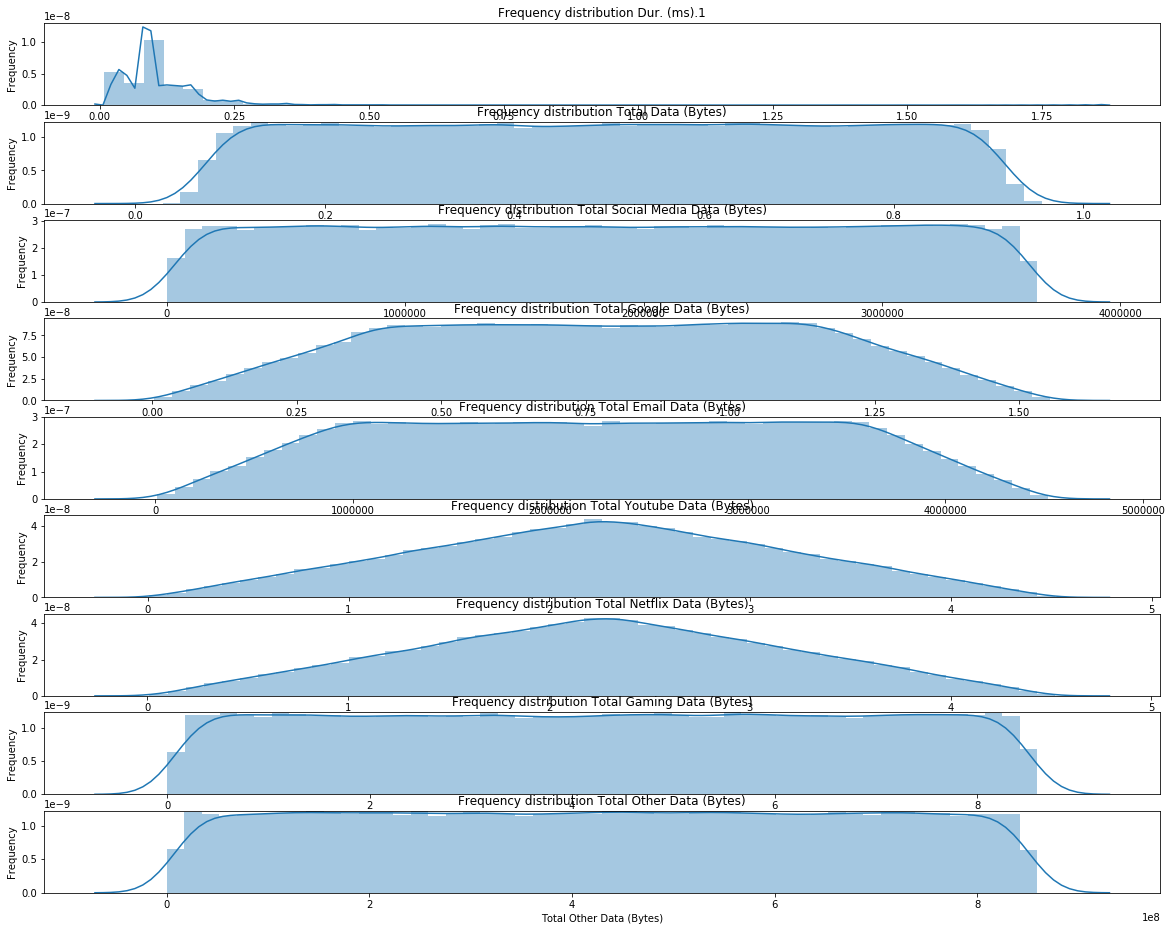

In [35]:
#Graphical Univariate analysis for numerical variables
var_names = ['Dur. (ms).1', 'Total Data (Bytes)', 'Total Social Media Data (Bytes)', 'Total Google Data (Bytes)', 'Total Email Data (Bytes)', 'Total Youtube Data (Bytes)', 'Total Netflix Data (Bytes)', 'Total Gaming Data (Bytes)', 'Total Other Data (Bytes)']

fig, ax = plt.subplots(len(var_names), figsize = (20, 16))

for i, var_val in enumerate(var_names):
    sns.distplot(data[var_val], hist = True, ax = ax[i])
    ax[i].set_title('Frequency distribution '+ var_val)
    ax[i].set_xlabel(var_val)
    ax[i].set_ylabel('Frequency')
    
plt.show()

### Graphical Bivariate Analysis

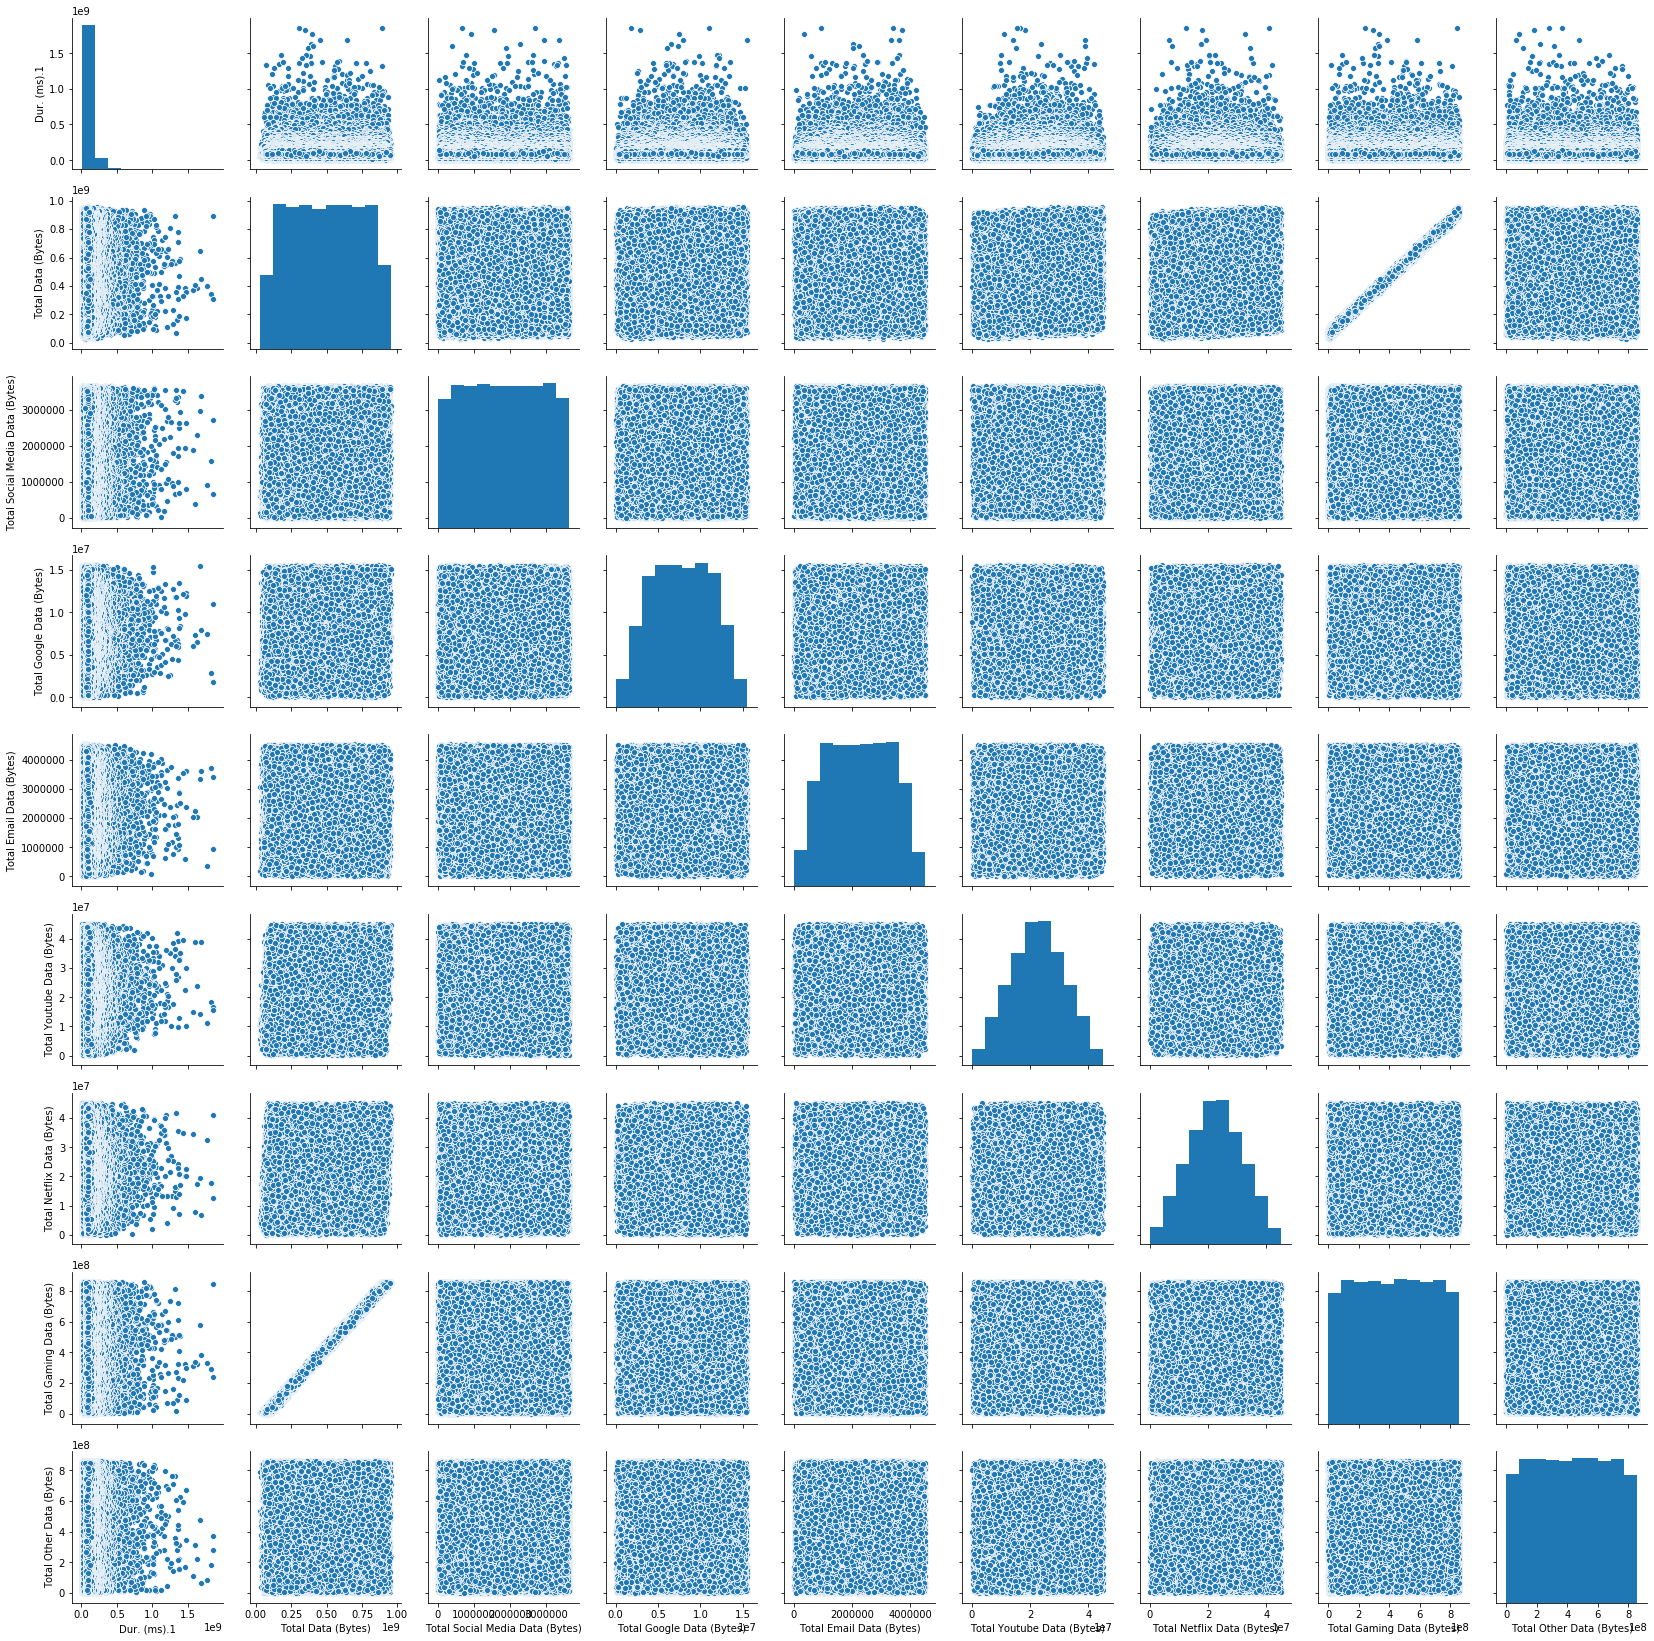

In [36]:
sns.pairplot(data)

### Variable transformations

In [37]:
transform_data = dataset.filter(['MSISDN/Number', 'Dur. (ms).1', 'Total Data (Bytes)'], axis = 0)
transform_data.head()

In [39]:
transform_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MSISDN/Number       148935 non-null  float64
 1   Dur. (ms).1         150000 non-null  float64
 2   Total Data (Bytes)  150000 non-null  float64
dtypes: float64(3)
memory usage: 9.6 MB


In [40]:
#MSISDN/Number is a unique identifier in this dataset, therefore, we'll change it's data type to object and drop all rows with missing values.
transform_data['MSISDN/Number'] = transform_data['MSISDN/Number'].astype('object')
transform_data = transform_data.dropna()

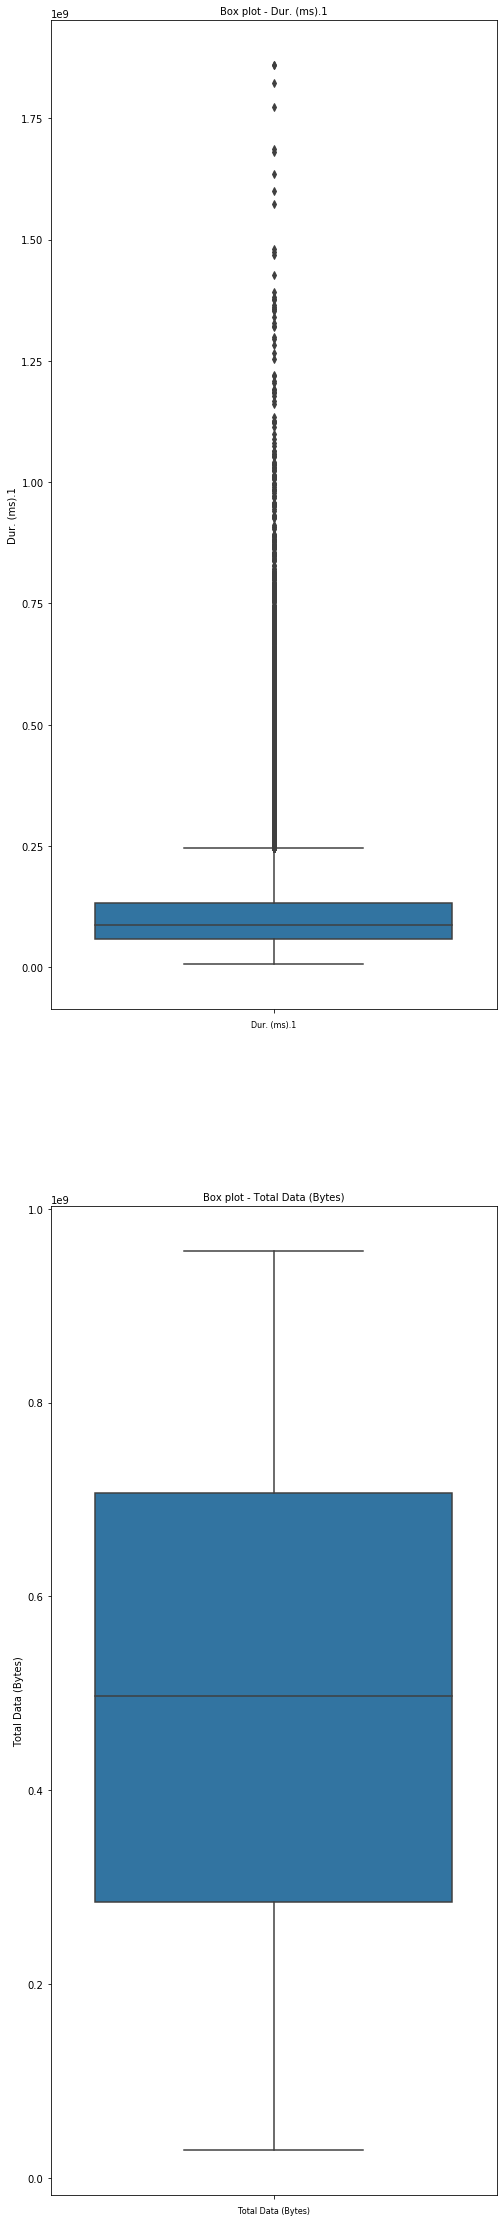

In [45]:
plot_outliers(transform_data, ['Dur. (ms).1', 'Total Data (Bytes)'])

In [204]:
replace_outlier_with_median(transform_data, 'Dur. (ms).1')

In [47]:
users = transform_data.groupby(['MSISDN/Number']).agg({'Dur. (ms).1': ['sum'], 'Total Data (Bytes)': ['sum']})
users.columns = ['Total Duration/user (ms)', 'Total Data/user (Bytes)']
users = users.reset_index()
users.sort_values(by = ['Total Duration/user (ms)'])
users.head()

,MSISDN/Number,Total Duration/user (ms),Total Data/user (Bytes)
0,3.360100e+10,116720140.0,8.786906e+08
1,3.360100e+10,181230963.0,1.568596e+08
2,3.360100e+10,134969374.0,5.959665e+08
3,3.360101e+10,49878024.0,4.223207e+08
4,3.360101e+10,37104453.0,1.457411e+09


In [48]:
users.shape

(106856, 3)

In [49]:
users_range = range(0,106856)
decile = []

for i in users_range:
    if i < 10:
        decile.append(1)
    elif i < 20:
        decile.append(2)
    elif i < 30:
        decile.append(3)
    elif i < 40:
        decile.append(4)
    elif i < 50:
        decile.append(5)
    else:
        decile.append('others')
        
users['Decile'] = decile
users = users.groupby('Decile').agg({'Total Data/user (Bytes)': 'sum'})
users.columns = ["Total Data/decile (Bytes)"]
users = users.reset_index()

print(tabulate(users, headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤══════════╤═════════════════════════════╕
│    │ Decile   │   Total Data/decile (Bytes) │
╞════╪══════════╪═════════════════════════════╡
│  0 │ 1        │                 6.83644e+09 │
├────┼──────────┼─────────────────────────────┤
│  1 │ 2        │                 5.05877e+09 │
├────┼──────────┼─────────────────────────────┤
│  2 │ 3        │                 7.70318e+09 │
├────┼──────────┼─────────────────────────────┤
│  3 │ 4        │                 7.17044e+09 │
├────┼──────────┼─────────────────────────────┤
│  4 │ 5        │                 6.75877e+09 │
├────┼──────────┼─────────────────────────────┤
│  5 │ others   │                 7.37999e+13 │
╘════╧══════════╧═════════════════════════════╛


### Correlation Analysis

In [195]:
correlation_data = dataset.filter(['Total Social Media Data (Bytes)', 'Total Google Data (Bytes)', 'Total Email Data (Bytes)', 'Total Youtube Data (Bytes)', 'Total Netflix Data (Bytes)', 'Total Gaming Data (Bytes)', 'Total Other Data (Bytes)'], axis = 1)

correlation_data.head()

,Total Social Media Data (Bytes),Total Google Data (Bytes),Total Email Data (Bytes),Total Youtube Data (Bytes),Total Netflix Data (Bytes),Total Gaming Data (Bytes),Total Other Data (Bytes)
0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0
1,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0
2,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0
3,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0
4,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0


In [196]:
correlation_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 7 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Total Social Media Data (Bytes)  150000 non-null  float64
 1   Total Google Data (Bytes)        150000 non-null  float64
 2   Total Email Data (Bytes)         150000 non-null  float64
 3   Total Youtube Data (Bytes)       150000 non-null  float64
 4   Total Netflix Data (Bytes)       150000 non-null  float64
 5   Total Gaming Data (Bytes)        150000 non-null  float64
 6   Total Other Data (Bytes)         150000 non-null  float64
dtypes: float64(7)
memory usage: 14.2 MB


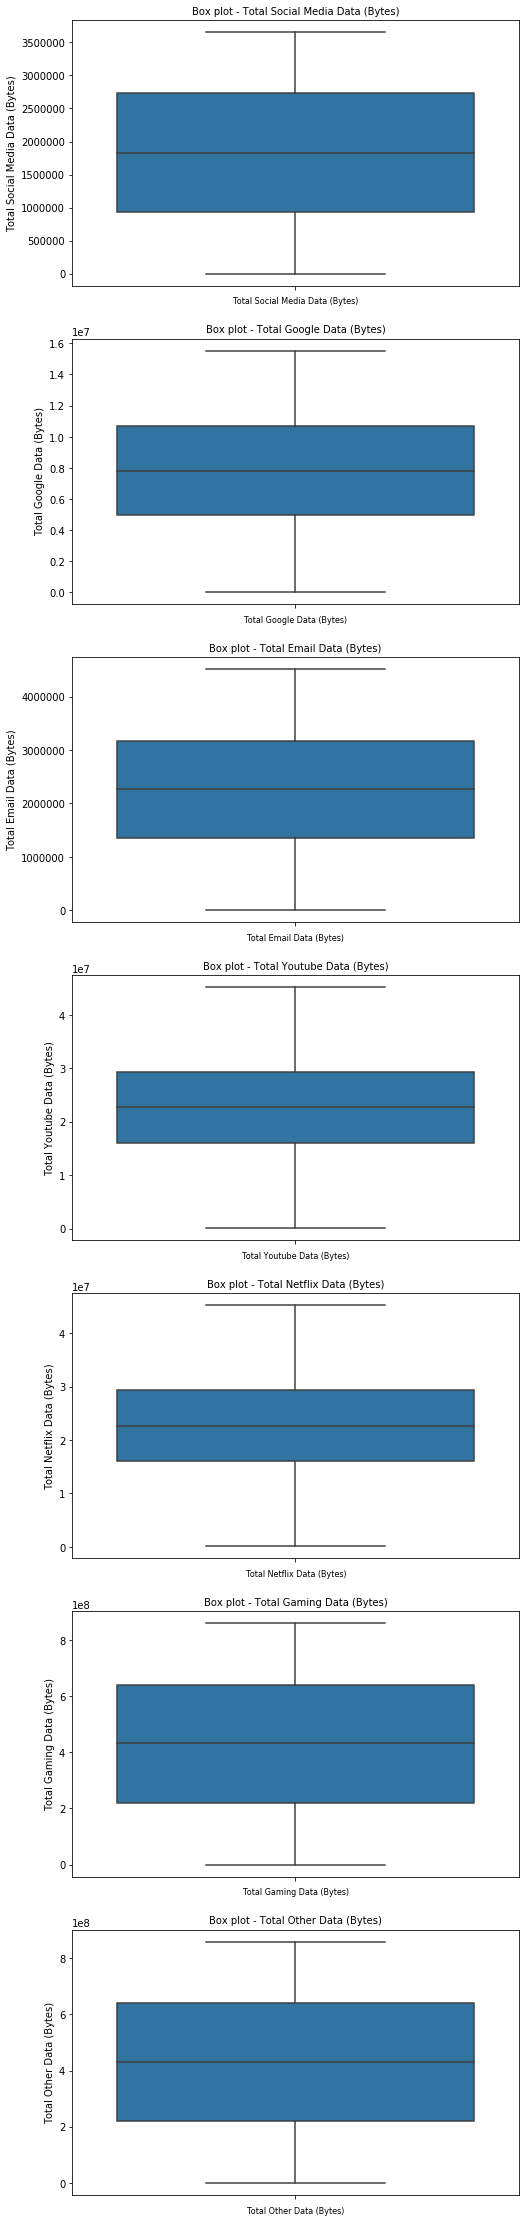

In [52]:
plot_outliers(correlation_data, ['Total Social Media Data (Bytes)', 'Total Google Data (Bytes)', 'Total Email Data (Bytes)', 'Total Youtube Data (Bytes)', 'Total Netflix Data (Bytes)', 'Total Gaming Data (Bytes)', 'Total Other Data (Bytes)'])

### Dimensionality Reduction

In [201]:
dimensional_data = dataset.filter(['MSISDN/Number', 'Total Data (Bytes)', 'Total Social Media Data (Bytes)', 'Total Google Data (Bytes)', 'Total Email Data (Bytes)', 'Total Youtube Data (Bytes)', 'Total Netflix Data (Bytes)', 'Total Gaming Data (Bytes)', 'Total Other Data (Bytes)'], axis = 1)

dimensional_data.head()

,MSISDN/Number,Total Data (Bytes),Total Social Media Data (Bytes),Total Google Data (Bytes),Total Email Data (Bytes),Total Youtube Data (Bytes),Total Netflix Data (Bytes),Total Gaming Data (Bytes),Total Other Data (Bytes)
0,3.3665e+10,345629377.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0
1,3.36819e+10,707185356.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0
2,3.37606e+10,307690973.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0
3,3.37503e+10,889352748.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0
4,3.36998e+10,607681403.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0


In [56]:
features = ['Total Data (Bytes)', 'Total Social Media Data (Bytes)', 'Total Google Data (Bytes)', 'Total Email Data (Bytes)', 'Total Youtube Data (Bytes)', 'Total Netflix Data (Bytes)', 'Total Gaming Data (Bytes)', 'Total Other Data (Bytes)']

In [57]:
#standardizing data

from sklearn.preprocessing import StandardScaler
x = dimensional_data.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [59]:
np.mean(x), np.std(x)

(-2.1858070908820082e-17, 1.000000000000001)

In [60]:
normalized_data = pd.DataFrame(x, columns = features)
normalized_data.tail()

,Total Data (Bytes),Total Social Media Data (Bytes),Total Google Data (Bytes),Total Email Data (Bytes),Total Youtube Data (Bytes),Total Netflix Data (Bytes),Total Gaming Data (Bytes),Total Other Data (Bytes)
149995,1.542662,-0.806333,-1.860318,1.886834,0.206575,0.754804,1.503267,-0.382671
149996,0.556670,1.630687,1.415536,-1.464115,0.574427,1.612520,0.432234,-1.696126
149997,0.859393,0.505897,-0.964598,-0.128264,-0.051690,1.945258,0.824912,1.172668
149998,0.539870,-0.548461,-0.347463,-0.187493,0.202549,-0.820543,0.559793,-1.220669
149999,-0.385638,-0.970545,-0.014227,0.552522,-0.597069,-0.662335,-0.308445,1.589829


Text(0, 0.5, 'cumulative explained variance')

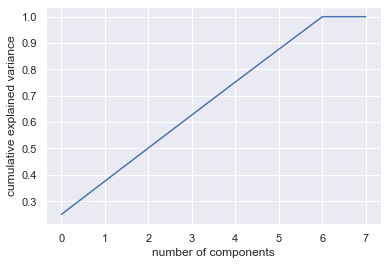

In [85]:
#choosing the number of components

from sklearn.decomposition import PCA
pca2 = PCA().fit(normalized_data)
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Using 6 components gives close to 90% with use of 7 or 8 components describing close to 100% of the variance.
For this PCA, we'll use 5 components at approximately 75% inclusion.

In [91]:
#projecting the 8-dimensional data to 5-dimensional data

from sklearn.decomposition import PCA
pcamodel = PCA(n_components = 5)
pca = pcamodel.fit_transform(normalized_data)
pca_df = pd.DataFrame(data = pca, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal componet 5'])

In [71]:
pca_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal componet 5
0,0.862271,-0.506739,1.367100,-0.934829,0.406889
1,-1.191508,-0.225542,-0.620016,2.216782,1.525289
2,1.084456,-0.157891,-0.089241,0.945841,-1.152865
3,-2.253883,1.069485,-1.950009,0.438680,-0.766236
4,-0.625290,0.463929,-1.133738,0.402352,0.119827


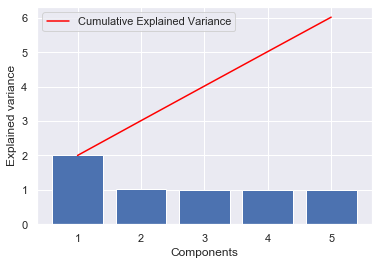

In [86]:
#explained_variance_ plot
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

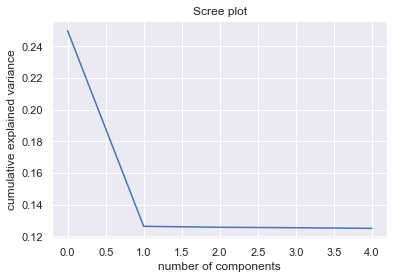

In [93]:
#explained_variance_ratio_ plot
plt.plot(pcamodel.explained_variance_ratio_)
plt.title('Scree plot')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#PCA1 is at 0 in xscale

Most of the features are clearly explaineda and encompassed by the first principal component

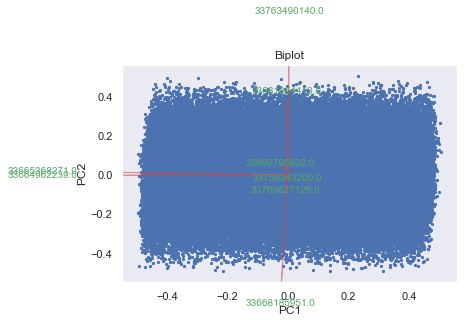

In [101]:
myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(dimensional_data['MSISDN/Number']))
plt.show()

## Task 2.1 : User Engagement Analysis

In [292]:
engagement_data = dataset.filter(['Bearer Id', 'MSISDN/Number', 'Dur. (ms).1', 'Total Data (Bytes)', 'Total Social Media Data (Bytes)', 'Total Google Data (Bytes)', 'Total Email Data (Bytes)', 'Total Youtube Data (Bytes)', 'Total Netflix Data (Bytes)', 'Total Gaming Data (Bytes)', 'Total Other Data (Bytes)'], axis = 1)

engagement_data.head()

,Bearer Id,MSISDN/Number,Dur. (ms).1,Total Data (Bytes),Total Social Media Data (Bytes),Total Google Data (Bytes),Total Email Data (Bytes),Total Youtube Data (Bytes),Total Netflix Data (Bytes),Total Gaming Data (Bytes),Total Other Data (Bytes)
0,13114483460844900352,3.3665e+10,1.823653e+09,345629377.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0
1,13114483482878900224,3.36819e+10,1.365104e+09,707185356.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0
2,13114483484080500736,3.37606e+10,1.361763e+09,307690973.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0
3,13114483485442799616,3.37503e+10,1.321510e+09,889352748.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0
4,13114483499480700928,3.36998e+10,1.089009e+09,607681403.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0


### top 10 customers in session frequency

In [118]:
frequent_customers = engagement_data.groupby(['MSISDN/Number']).agg({'Bearer Id': ['count']})
frequent_customers.columns = ['session frequency']
frequent_customers = frequent_customers.reset_index()

top_frequent_customers = frequent_customers.nlargest(10, 'session frequency')
print('Top 10 customers based on session frequency')
print('------------------------------------------------')
print(tabulate(top_frequent_customers, headers = 'keys', tablefmt = 'fancy_grid'))

Top 10 customers based on session frequency
------------------------------------------------
╒═══════╤═════════════════╤═════════════════════╕
│       │   MSISDN/Number │   session frequency │
╞═══════╪═════════════════╪═════════════════════╡
│ 13526 │     3.36263e+10 │                  18 │
├───────┼─────────────────┼─────────────────────┤
│  6437 │     3.36149e+10 │                  17 │
├───────┼─────────────────┼─────────────────────┤
│ 13180 │     3.36258e+10 │                  17 │
├───────┼─────────────────┼─────────────────────┤
│ 37052 │     3.36597e+10 │                  16 │
├───────┼─────────────────┼─────────────────────┤
│ 76363 │     3.36759e+10 │                  15 │
├───────┼─────────────────┼─────────────────────┤
│ 92923 │     3.37605e+10 │                  15 │
├───────┼─────────────────┼─────────────────────┤
│ 65118 │     3.36672e+10 │                  13 │
├───────┼─────────────────┼─────────────────────┤
│   666 │     3.36031e+10 │                  12 │
├──────

### top 10 customers in session duration

In [119]:
customers_session_duration = engagement_data.groupby(['MSISDN/Number']).agg({'Dur. (ms).1': ['sum']})
customers_session_duration.columns = ['total session duration']
customers_session_duration = customers_session_duration.reset_index()

top_customers_session_duration = customers_session_duration.nlargest(10, 'total session duration')
print('Top 10 customers based on session duration')
print('------------------------------------------------')
print(tabulate(top_customers_session_duration, headers = 'keys', tablefmt = 'fancy_grid'))

Top 10 customers based on session duration
------------------------------------------------
╒═══════╤═════════════════╤══════════════════════════╕
│       │   MSISDN/Number │   total session duration │
╞═══════╪═════════════════╪══════════════════════════╡
│ 13180 │     3.36258e+10 │              1.85538e+10 │
├───────┼─────────────────┼──────────────────────────┤
│  6437 │     3.36149e+10 │              9.96691e+09 │
├───────┼─────────────────┼──────────────────────────┤
│ 92923 │     3.37605e+10 │              9.27944e+09 │
├───────┼─────────────────┼──────────────────────────┤
│ 13526 │     3.36263e+10 │              8.79194e+09 │
├───────┼─────────────────┼──────────────────────────┤
│ 65118 │     3.36672e+10 │              8.74492e+09 │
├───────┼─────────────────┼──────────────────────────┤
│ 50281 │     3.36628e+10 │              6.61427e+09 │
├───────┼─────────────────┼──────────────────────────┤
│ 57160 │     3.36647e+10 │              6.28874e+09 │
├───────┼─────────────────┼─

### top 10 customers in session total traffic (download and upload (Bytes))

In [120]:
customer_traffic = engagement_data.groupby(['MSISDN/Number']).agg({'Total Data (Bytes)': ['sum']})
customer_traffic.columns = ['total traffic']
customer_traffic = customer_traffic.reset_index()

top_customer_traffic = customer_traffic.nlargest(10, 'total traffic')
print('Top 10 customers based on sessions total traffic')
print('------------------------------------------------')
print(tabulate(top_customer_traffic, headers = 'keys', tablefmt = 'fancy_grid'))

Top 10 customers based on sessions total traffic
------------------------------------------------
╒═══════╤═════════════════╤═════════════════╕
│       │   MSISDN/Number │   total traffic │
╞═══════╪═════════════════╪═════════════════╡
│  6437 │     3.36149e+10 │     8.84623e+09 │
├───────┼─────────────────┼─────────────────┤
│ 92923 │     3.37605e+10 │     8.51477e+09 │
├───────┼─────────────────┼─────────────────┤
│ 13180 │     3.36258e+10 │     8.49962e+09 │
├───────┼─────────────────┼─────────────────┤
│ 13526 │     3.36263e+10 │     7.97117e+09 │
├───────┼─────────────────┼─────────────────┤
│ 76363 │     3.36759e+10 │     7.89111e+09 │
├───────┼─────────────────┼─────────────────┤
│ 37052 │     3.36597e+10 │     7.70586e+09 │
├───────┼─────────────────┼─────────────────┤
│ 63028 │     3.36665e+10 │     7.3085e+09  │
├───────┼─────────────────┼─────────────────┤
│ 92577 │     3.37604e+10 │     7.13237e+09 │
├───────┼─────────────────┼─────────────────┤
│ 57241 │     3.36647e+10 │ 

### Normalizing and k-means Clustering

In [293]:
normalization_data = engagement_data.groupby(['MSISDN/Number']).agg({'Bearer Id':['count'], 'Dur. (ms).1': ['sum'], 'Total Data (Bytes)': ['sum']})
normalization_data.columns = ['session frequency', 'session duration', 'total traffic']
normalization_data = normalization_data.reset_index()
normalization_data = normalization_data.drop(['MSISDN/Number'], axis = 1)
normalization_data.head()

,session frequency,session duration,total traffic
0,1,116720140.0,8.786906e+08
1,1,181230963.0,1.568596e+08
2,1,134969374.0,5.959665e+08
3,1,49878024.0,4.223207e+08
4,2,37104453.0,1.457411e+09


In [294]:
from sklearn import preprocessing as p

n = normalization_data.values
min_max_scaler = p.MinMaxScaler()
n_scaled = min_max_scaler.fit_transform(n)
normalized_metrics = pd.DataFrame(n_scaled, columns = ['session frequency', 'session duration', 'total traffic'])
normalized_metrics.head()

,session frequency,session duration,total traffic
0,0.000000,0.005908,0.095931
1,0.000000,0.009387,0.014026
2,0.000000,0.006892,0.063851
3,0.000000,0.002304,0.044148
4,0.058824,0.001615,0.161598


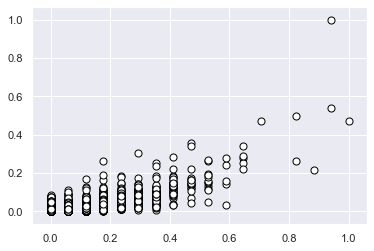

In [295]:
plt.scatter(
   n_scaled[:, 0], n_scaled[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

In [296]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(n_scaled)

In [297]:
n_scaled.shape

(106856, 3)

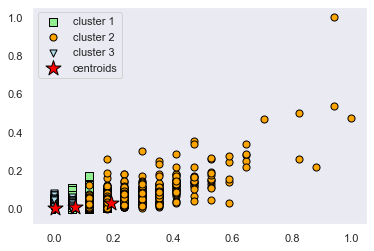

In [144]:
# plot the 3 clusters
plt.scatter(
    n_scaled[y_km == 0, 0], n_scaled[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    n_scaled[y_km == 1, 0], n_scaled[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    n_scaled[y_km == 2, 0], n_scaled[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [304]:
normalization_data['cluster'] = y_km

In [305]:
normalization_data.head()

,session frequency,session duration,total traffic,cluster
0,1,116720140.0,8.786906e+08,2
1,1,181230963.0,1.568596e+08,2
2,1,134969374.0,5.959665e+08,2
3,1,49878024.0,4.223207e+08,2
4,2,37104453.0,1.457411e+09,0


In [165]:
normalization_data = normalization_data.groupby('cluster').agg(['max','min', 'sum', np.mean])
normalization_data.columns = ["Frequency Max", "Frequency Min", "Frequency Total", "Frequency Avg", "Duration Max", "Duration Min", "Duration Total", "Duration Avg", "Traffic Max", "Traffic Min", "Traffic Total", "Traffic Avg"]
normalization_data = normalization_data.reset_index()

In [166]:
normalization_data

,cluster,Frequency Max,Frequency Min,Frequency Total,Frequency Avg,Duration Max,Duration Min,Duration Total,Duration Avg,Traffic Max,Traffic Min,Traffic Total,Traffic Avg
0,0,4,2,47083,2.176443,3.174825e+09,18235797.0,4.621274e+12,2.136215e+08,1.873330e+09,2.842182e+08,2.435209e+13,1.125692e+09
1,1,18,3,17259,4.249938,1.855376e+10,46899075.0,2.313826e+12,5.697676e+08,8.846226e+09,1.085994e+09,9.264643e+12,2.281370e+09
2,2,2,1,84593,1.042273,1.573421e+09,7142988.0,8.683819e+12,1.069937e+08,9.507607e+08,3.324901e+07,4.021672e+13,4.955116e+08


In [167]:
app_engaged_users = engagement_data.groupby(['MSISDN/Number']).agg({'Total Social Media Data (Bytes)':['sum'], 'Total Google Data (Bytes)': ['sum'], 'Total Email Data (Bytes)': ['sum'], 'Total Youtube Data (Bytes)': ['sum'], 'Total Netflix Data (Bytes)': ['sum'], 'Total Gaming Data (Bytes)': ['sum'], 'Total Other Data (Bytes)': ['sum']})
app_engaged_users.columns = ['Social Media Traffic', 'Google Traffic', 'Email Traffic', 'Youtube Traffic', 'Netflix Traffic', 'Gaming Traffic', 'Other Traffic']
app_engaged_users = app_engaged_users.reset_index()
app_engaged_users.head()

,MSISDN/Number,Social Media Traffic,Google Traffic,Email Traffic,Youtube Traffic,Netflix Traffic,Gaming Traffic,Other Traffic
0,3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
1,3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
2,3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0
3,3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
4,3.360101e+10,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0


In [173]:
#calling top_10_users function
top_10_users('Social Media Traffic', 'Social Media')
top_10_users('Google Traffic', 'Google')
top_10_users('Email Traffic', 'Email')
top_10_users('Youtube Traffic', 'Youtube')
top_10_users('Netflix Traffic', 'Netflix')
top_10_users('Gaming Traffic', 'Gaming')
top_10_users('Other Traffic', 'Other')

Top 10 customers : Social Media
------------------------------------------------
╒════════╤═════════════════╤════════════════════════╕
│        │   MSISDN/Number │   Social Media Traffic │
╞════════╪═════════════════╪════════════════════════╡
│  13526 │     3.36263e+10 │            4.33748e+07 │
├────────┼─────────────────┼────────────────────────┤
│  92923 │     3.37605e+10 │            3.97832e+07 │
├────────┼─────────────────┼────────────────────────┤
│  37052 │     3.36597e+10 │            3.54124e+07 │
├────────┼─────────────────┼────────────────────────┤
│   6437 │     3.36149e+10 │            2.82945e+07 │
├────────┼─────────────────┼────────────────────────┤
│  13180 │     3.36258e+10 │            2.71355e+07 │
├────────┼─────────────────┼────────────────────────┤
│  65118 │     3.36672e+10 │            2.42478e+07 │
├────────┼─────────────────┼────────────────────────┤
│ 106137 │     3.37863e+10 │            2.39749e+07 │
├────────┼─────────────────┼────────────────────────┤
│

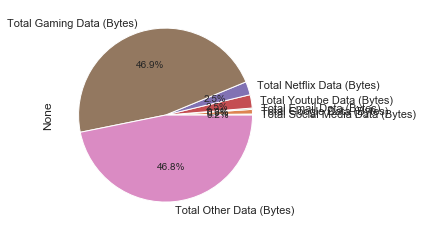

In [181]:
applications_data = engagement_data.drop(['MSISDN/Number', 'Bearer Id', 'Dur. (ms).1', 'Total Data (Bytes)'], axis=1)
apps = applications_data.sum()
apps.plot.pie(autopct='%1.1f%%')

### The Elbow method

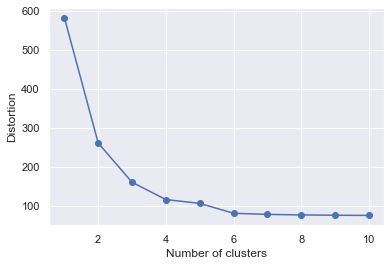

In [183]:
#the elbow method for estimating the optimal number of clusters k
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(n_scaled)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

From the above plot, the elbow is located at k = 4

In [186]:
#using k=4 clusters to segment the engagements metrics

km2 = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km2 = km2.fit_predict(n_scaled)

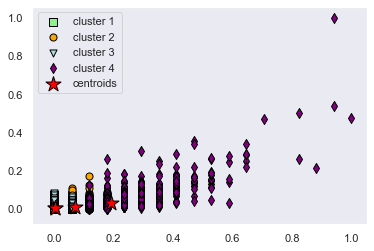

In [187]:
# plot the 4 clusters
plt.scatter(
    n_scaled[y_km2 == 0, 0], n_scaled[y_km2 == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    n_scaled[y_km2 == 1, 0], n_scaled[y_km2 == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    n_scaled[y_km2 == 2, 0], n_scaled[y_km2 == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    n_scaled[y_km2 == 3, 0], n_scaled[y_km2 == 3, 1],
    s=50, c='purple',
    marker='d', edgecolor='black',
    label='cluster 4'
)

# plot the centroids
plt.scatter(
    km2.cluster_centers_[:, 0], km2.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## Experience Analytics

In [225]:
experience_data = dataset.filter(['MSISDN/Number', 'Handset Type', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'], axis = 1)
experience_data.head()

,MSISDN/Number,Handset Type,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,3.3665e+10,Samsung Galaxy A5 Sm-A520F,NaN,NaN,42.0,5.0,23.0,44.0
1,3.36819e+10,Samsung Galaxy J5 (Sm-J530),NaN,NaN,65.0,5.0,16.0,26.0
2,3.37606e+10,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,6.0,9.0
3,3.37503e+10,undefined,NaN,NaN,NaN,NaN,44.0,44.0
4,3.36998e+10,Samsung Sm-G390F,NaN,NaN,NaN,NaN,6.0,9.0


In [226]:
experience_data.isnull().sum()

MSISDN/Number                   1065
Handset Type                     571
TCP DL Retrans. Vol (Bytes)    88145
TCP UL Retrans. Vol (Bytes)    96648
Avg RTT DL (ms)                27828
Avg RTT UL (ms)                27811
Avg Bearer TP DL (kbps)            0
Avg Bearer TP UL (kbps)            0
dtype: int64

In [227]:
#MSISDN/Number is a unique identifier, we'll therefore drop all the columns with missing data.
experience_data = experience_data.dropna(subset=['MSISDN/Number'])

#replacing all the other missing values with mean of their columns
experience_data = experience_data.fillna(experience_data.mean())

MSISDN/Number                      0
Handset Type                       0
TCP DL Retrans. Vol (Bytes)    87796
TCP UL Retrans. Vol (Bytes)    96192
Avg RTT DL (ms)                27644
Avg RTT UL (ms)                27625
Avg Bearer TP DL (kbps)            0
Avg Bearer TP UL (kbps)            0
dtype: int64

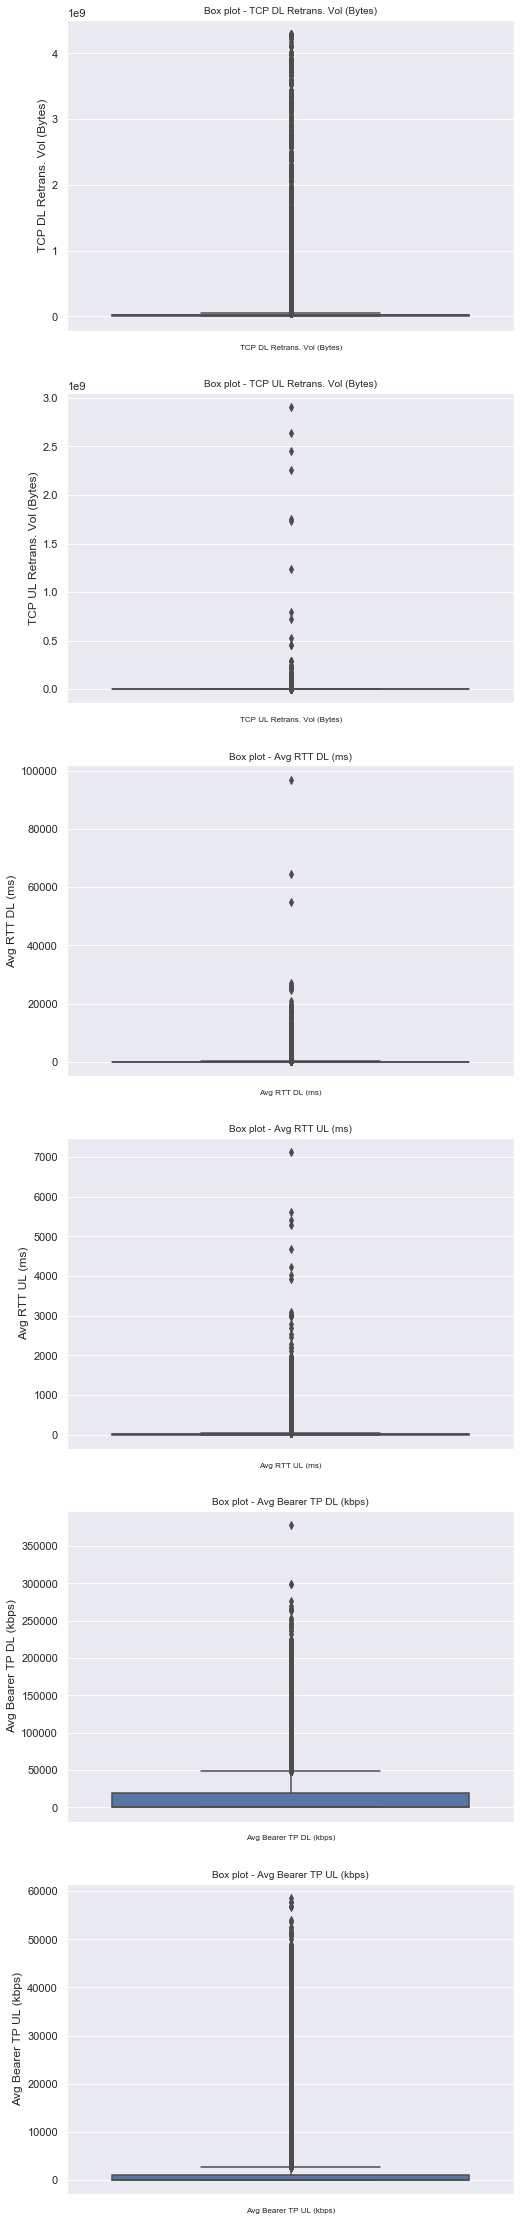

In [229]:
#detecting outliers in the numerical features to decide whether to replace with mean or median
#calling an already defined functin for plotting outliers

plot_outliers(experience_data, ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'])

The four features used for experience analysis have a lot of outliers, we will therefore be replacing the missing data with with median of each feature

In [230]:
replace_outlier_with_median(experience_data, 'TCP DL Retrans. Vol (Bytes)')
replace_outlier_with_median(experience_data, 'TCP UL Retrans. Vol (Bytes)')
replace_outlier_with_median(experience_data, 'Avg RTT DL (ms)')
replace_outlier_with_median(experience_data, 'Avg RTT UL (ms)')

### The top, bottom and most frequent 10 TCP values in the dataset

In [243]:
def top_bottom_expmetrics(variables):
    for variable in variables:
        data = experience_data.filter([variable], axis = 1)
        data = data.groupby([variable]).agg({variable:['count']})
        data.columns = ['Frequency']
        data = data.reset_index()

        top10 = data.nlargest(10, 'Frequency')
        bottom10 = data.nsmallest(10, 'Frequency')
        
        print('Top 10 '+ variable)
        print('------------------------------------------------')
        print(tabulate(top10, headers = 'keys', tablefmt = 'fancy_grid'))
        
        print('Bottom 10 '+ variable)
        print('------------------------------------------------')
        print(tabulate(bottom10, headers = 'keys', tablefmt = 'fancy_grid'))

In [244]:
top_bottom_expmetrics(['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'])

Top 10 TCP DL Retrans. Vol (Bytes)
------------------------------------------------
╒═══════╤═══════════════════════════════╤═════════════╕
│       │   TCP DL Retrans. Vol (Bytes) │   Frequency │
╞═══════╪═══════════════════════════════╪═════════════╡
│ 48774 │                   2.08842e+07 │       90303 │
├───────┼───────────────────────────────┼─────────────┤
│   876 │                1330           │         424 │
├───────┼───────────────────────────────┼─────────────┤
│  1597 │                2660           │         215 │
├───────┼───────────────────────────────┼─────────────┤
│    18 │                  38           │         200 │
├───────┼───────────────────────────────┼─────────────┤
│    63 │                  92           │         190 │
├───────┼───────────────────────────────┼─────────────┤
│   865 │                1318           │         154 │
├───────┼───────────────────────────────┼─────────────┤
│   389 │                 543           │         130 │
├───────┼───────────

Top 10 Avg Bearer TP UL (kbps)
------------------------------------------------
╒════╤═══════════════════════════╤═════════════╕
│    │   Avg Bearer TP UL (kbps) │   Frequency │
╞════╪═══════════════════════════╪═════════════╡
│ 40 │                        40 │        7787 │
├────┼───────────────────────────┼─────────────┤
│ 54 │                        54 │        6336 │
├────┼───────────────────────────┼─────────────┤
│ 47 │                        47 │        5833 │
├────┼───────────────────────────┼─────────────┤
│ 53 │                        53 │        4823 │
├────┼───────────────────────────┼─────────────┤
│ 52 │                        52 │        3780 │
├────┼───────────────────────────┼─────────────┤
│  9 │                         9 │        3751 │
├────┼───────────────────────────┼─────────────┤
│ 51 │                        51 │        3640 │
├────┼───────────────────────────┼─────────────┤
│ 44 │                        44 │        3358 │
├────┼───────────────────────────┼────

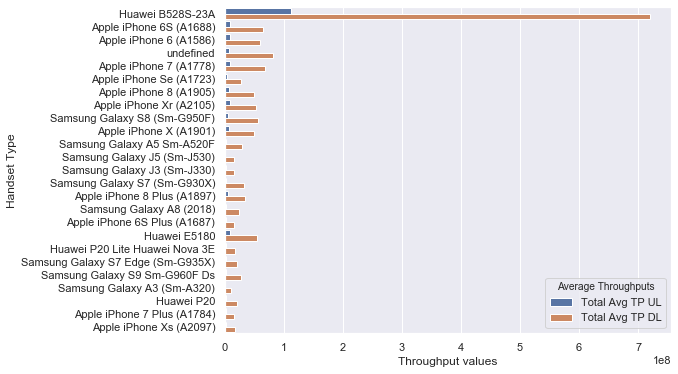

In [261]:
avg_tp_data = experience_data.filter(['Handset Type', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'], axis = 1)
avg_tp_data = avg_tp_data.groupby('Handset Type').agg({'Avg Bearer TP DL (kbps)':['sum'],'Avg Bearer TP UL (kbps)':['sum'], 'Handset Type': ['count']})
avg_tp_data.columns = ['Total Avg TP DL', 'Total Avg TP UL', 'Frequency']
avg_tp_data = avg_tp_data.reset_index()

top25 = avg_tp_data.nlargest(25, 'Frequency')
top25 = top25.drop(['Frequency'], axis = 1)

top25 = pd.melt(top25, id_vars=['Handset Type'], value_vars=['Total Avg TP UL', 'Total Avg TP DL'],var_name='Average Throughputs', value_name='Throughput values')

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x="Throughput values", y="Handset Type", hue = 'Average Throughputs', data=top25)

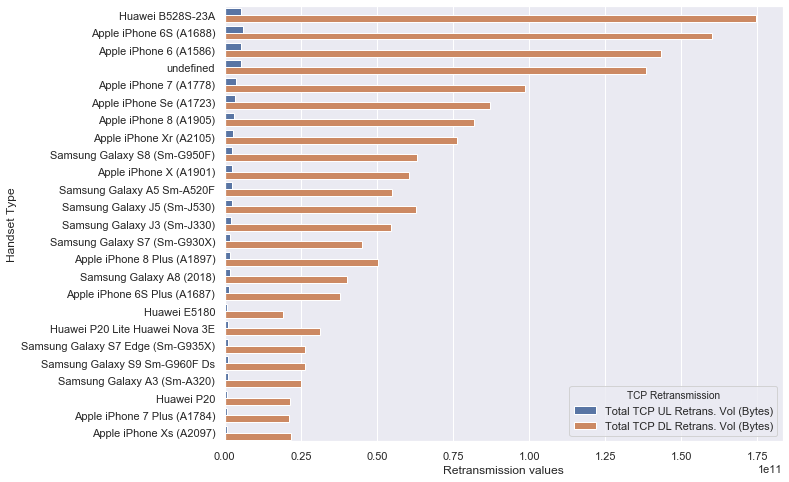

In [263]:
avg_tcp_data = experience_data.filter(['Handset Type', 'TCP UL Retrans. Vol (Bytes)', 'TCP DL Retrans. Vol (Bytes)'], axis = 1)
avg_tcp_data = avg_tcp_data.groupby('Handset Type').agg({'TCP UL Retrans. Vol (Bytes)':['sum'],'TCP DL Retrans. Vol (Bytes)':['sum'], 'Handset Type': ['count']})
avg_tcp_data.columns = ['Total TCP UL Retrans. Vol (Bytes)', 'Total TCP DL Retrans. Vol (Bytes)', 'Frequency']
avg_tcp_data = avg_tcp_data.reset_index()

top25 = avg_tcp_data.nlargest(25, 'Frequency')
top25 = top25.drop(['Frequency'], axis = 1)

top25 = pd.melt(top25, id_vars=['Handset Type'], value_vars=['Total TCP UL Retrans. Vol (Bytes)', 'Total TCP DL Retrans. Vol (Bytes)'],var_name='TCP Retransmission', value_name='Retransmission values')

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x="Retransmission values", y="Handset Type", hue = 'TCP Retransmission', data=top25)

In [349]:
clustering_data = experience_data.drop(['Handset Type', 'MSISDN/Number'], axis =1)
clustering_experience = clustering_data.values

min_max_scaler = p.MinMaxScaler()
ce_scaled = min_max_scaler.fit_transform(clustering_experience)
normalized_experience = pd.DataFrame(ce_scaled, columns = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'])

km3 = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km3 = km3.fit_predict(ce_scaled)

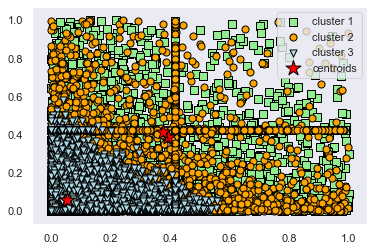

In [350]:
# plot the 3 clusters
plt.scatter(
    ce_scaled[y_km3 == 0, 0], ce_scaled[y_km3 == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    ce_scaled[y_km3 == 1, 0], ce_scaled[y_km3 == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    ce_scaled[y_km3 == 2, 0], ce_scaled[y_km3 == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km3.cluster_centers_[:, 0], km3.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [344]:
experience_clusters = clustering_data.copy()
experience_clusters['Total TCP Retrans. Vol'] = experience_clusters['TCP DL Retrans. Vol (Bytes)'] + experience_clusters['TCP UL Retrans. Vol (Bytes)']
experience_clusters['Total Avg RTT'] = experience_clusters['Avg RTT DL (ms)'] + experience_clusters['Avg RTT UL (ms)']
experience_clusters['Total Avg Throughput'] = experience_clusters['Avg Bearer TP DL (kbps)'] + experience_clusters['Avg Bearer TP UL (kbps)']

experience_clusters = experience_clusters.filter(['Total TCP Retrans. Vol', 'Total Avg RTT', 'Total Avg Throughput'],axis = 1)

experience_clusters['cluster'] = y_km3

cluster_agregates = experience_clusters.groupby('cluster').agg(['max','min', 'sum', np.mean])
cluster_agregates.columns = ["Retrans. Max", "Retrans. Min", "Retrans. Total", "Retrans. Avg", "RTT Max", "RTT Min", "RTT Total", "RTT Avg", "Throughput Max", "Throughput Min", "Throughput Total", "Throughput Avg"]

cluster_agregates = cluster_agregates.reset_index()

In [345]:
cluster_agregates.head()

,cluster,Retrans. Max,Retrans. Min,Retrans. Total,Retrans. Avg,RTT Max,RTT Min,RTT Total,RTT Avg,Throughput Max,Throughput Min,Throughput Total,Throughput Avg
0,0,50613093.0,3901.000000,7.756429e+11,2.042402e+07,256.0,28.0,4.696306e+06,123.661857,269392.0,0.0,3.187629e+08,8393.578350
1,1,51683903.0,766249.496104,1.260472e+12,1.954463e+07,155.0,0.0,2.774362e+06,43.018697,283931.0,0.0,2.220872e+08,3443.639149
2,2,28011017.0,86.000000,1.324732e+11,2.850972e+06,237.0,19.0,3.514749e+06,75.641311,382262.0,5.0,1.701658e+09,36621.571084


## Satisfaction Analysis

### Engagement score

In [324]:
#determining the least cluster

cluster_count = normalization_data.groupby('cluster').agg({'cluster':['count']})
cluster_count.columns = ['Frequency']
cluster_count = cluster_count.reset_index()
cluster_count

,cluster,Frequency
0,0,21633
1,1,4061
2,2,81162


The second cluster at cluster[1] is our least cluster, we'll therefore compare data points from its centroid

In [363]:
#the centroid for cluster[1]
centroid = km.cluster_centers_[1]

#creating a dataMart for calculating the engagement score
eng_score_data = normalized_metrics.copy()

#appending users to the dataMart and calculating the engagement score using euclidean formula
users = engagement_data['MSISDN/Number']
eng_score_data['MSISDN/Number'] = users
eng_score_data['engagement score'] = (((eng_score_data['session frequency'] - centroid[0])**2) + ((eng_score_data['session duration'] - centroid[1])**2) + ((eng_score_data['total traffic'] - centroid[2])**2))**5

#aggregaging the engagement score per user
eng_score_data = eng_score_data.groupby('MSISDN/Number').agg({'engagement score':['sum']})
eng_score_data.columns = ['Engagement Score']
eng_score_data = eng_score_data.reset_index()
eng_score_data.head()

,MSISDN/Number,Engagement Score
0,3.360100e+10,1.284519e-06
1,3.360101e+10,3.179091e-06
2,3.360101e+10,8.656109e-06
3,3.360101e+10,5.817943e-06
4,3.360101e+10,9.529766e-07


### Experience Score

In [364]:
#determining the least cluster

cluster_count2 = experience_clusters.groupby('cluster').agg({'cluster':['count']})
cluster_count2.columns = ['Frequency']
cluster_count2 = cluster_count2.reset_index()
cluster_count2

,cluster,Frequency
0,0,37977
1,1,64492
2,2,46466


The first cluster at cluster[0] is our least cluster, we'll therefore compare data points from its centroid

In [367]:
#the centroid for cluster[0]
centroid = km3.cluster_centers_[0]

#creating a dataMart for calculating the experience score
exp_score_data = normalized_experience.copy()

#appending users to the dataMart and calculating the experience score using euclidean formula
users = engagement_data['MSISDN/Number']
exp_score_data['MSISDN/Number'] = users
exp_score_data['experience score'] = (((exp_score_data['TCP DL Retrans. Vol (Bytes)'] - centroid[0])**2) + ((exp_score_data['TCP UL Retrans. Vol (Bytes)'] - centroid[1])**2) + ((exp_score_data['Avg RTT DL (ms)'] - centroid[2])**2) + ((exp_score_data['Avg RTT UL (ms)'] - centroid[3])**2) + ((exp_score_data['Avg Bearer TP DL (kbps)'] - centroid[4])**2) + ((exp_score_data['Avg Bearer TP UL (kbps)'] - centroid[5])**2))**5

#aggregaging the engagement score per user
exp_score_data = exp_score_data.groupby('MSISDN/Number').agg({'experience score':['sum']})
exp_score_data.columns = ['Experience Score']
exp_score_data = exp_score_data.reset_index()
exp_score_data.head()

,MSISDN/Number,Experience Score
0,3.360100e+10,6.400886e-03
1,3.360100e+10,1.573086e-12
2,3.360100e+10,7.750961e-04
3,3.360101e+10,4.082292e-04
4,3.360101e+10,1.433083e-02


### Satisfaction Score

In [368]:
satisfaction_score = pd.merge(exp_score_data, eng_score_data, on = 'MSISDN/Number', how = 'inner')
satisfaction_score['satisfaction score'] = ((satisfaction_score['Experience Score'] + satisfaction_score['Engagement Score'])/2)
top10_satisfied = satisfaction_score.nlargest(10, 'satisfaction score')

print(tabulate(top10_satisfied, headers = 'keys', tablefmt = 'fancy_grid'))

╒═══════╤═════════════════╤════════════════════╤════════════════════╤══════════════════════╕
│       │   MSISDN/Number │   Experience Score │   Engagement Score │   satisfaction score │
╞═══════╪═════════════════╪════════════════════╪════════════════════╪══════════════════════╡
│ 65008 │     3.36984e+10 │         0.0243564  │       32.0884      │             16.0564  │
├───────┼─────────────────┼────────────────────┼────────────────────┼──────────────────────┤
│ 19895 │     3.36508e+10 │        11.4002     │        3.6987e-06  │              5.70009 │
├───────┼─────────────────┼────────────────────┼────────────────────┼──────────────────────┤
│ 79177 │     3.37814e+10 │         5.82216    │        1.05206e-06 │              2.91108 │
├───────┼─────────────────┼────────────────────┼────────────────────┼──────────────────────┤
│ 25894 │     3.36591e+10 │         5.36679    │        1.27888e-05 │              2.6834  │
├───────┼─────────────────┼────────────────────┼────────────────────┼─

In [369]:
cluster4 = satisfaction_score.filter(['Engagement Score', 'Experience Score'], axis =1)
cluster4_values = cluster4.values

min_max_scaler = p.MinMaxScaler()
c4_scaled = min_max_scaler.fit_transform(cluster4_values)
normalized_engexp = pd.DataFrame(c4_scaled, columns = ['Engagement Score', 'Experience Score'])

km4 = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km4 = km4.fit_predict(c4_scaled)

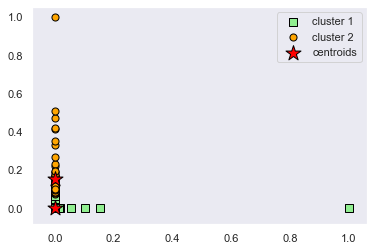

In [370]:
# plot the 2 clusters
plt.scatter(
    c4_scaled[y_km4 == 0, 0], c4_scaled[y_km4 == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    c4_scaled[y_km4 == 1, 0], c4_scaled[y_km4 == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plot the centroids
plt.scatter(
    km4.cluster_centers_[:, 0], km4.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [371]:
y = satisfaction_score.copy()
y = y.filter(['satisfaction score', 'Experience Score'], axis = 1)

y['cluster'] = y_km4

cluster4_agregates = y.groupby('cluster').agg([np.mean])
cluster4_agregates.columns = ['Average Satisfaction Score', 'Average Experience Score']
cluster4_agregates = cluster4_agregates.reset_index()
cluster4_agregates

,cluster,Average Satisfaction Score,Average Experience Score
0,0,0.007762,0.014988
1,1,0.867988,1.735973
